In [1]:
import pandas as pd
import numpy as np

In [2]:
# jag hittade min data på kaggle https://www.kaggle.com/datasets/syuzai/perth-house-prices
# perth är en stor stad i australien

perth = pd.read_csv("all_perth_310121.csv")

In [3]:
perth

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33651,9C Gold Street,South Fremantle,1040000,4,3,2.0,292,245,2013.0,16100,Fremantle Station,1500,03-2016\r,6162,-32.064580,115.751820,CHRISTIAN BROTHERS' COLLEGE,1.430350,49.0
33652,9C Pycombe Way,Westminster,410000,3,2,2.0,228,114,NaN,9600,Stirling Station,4600,02-2017\r,6061,-31.867055,115.841403,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL,1.679644,35.0
33653,9D Pycombe Way,Westminster,427000,3,2,2.0,261,112,NaN,9600,Stirling Station,4600,02-2017\r,6061,-31.866890,115.841418,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL,1.669159,35.0
33654,9D Shalford Way,Girrawheen,295000,3,1,2.0,457,85,1974.0,12600,Warwick Station,4400,10-2016\r,6064,-31.839680,115.842410,GIRRAWHEEN SENIOR HIGH SCHOOL,0.358494,NaN


# Data preparation och Cleaning

In [4]:
perth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33656 entries, 0 to 33655
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ADDRESS           33656 non-null  object 
 1   SUBURB            33656 non-null  object 
 2   PRICE             33656 non-null  int64  
 3   BEDROOMS          33656 non-null  int64  
 4   BATHROOMS         33656 non-null  int64  
 5   GARAGE            31178 non-null  float64
 6   LAND_AREA         33656 non-null  int64  
 7   FLOOR_AREA        33656 non-null  int64  
 8   BUILD_YEAR        30501 non-null  float64
 9   CBD_DIST          33656 non-null  int64  
 10  NEAREST_STN       33656 non-null  object 
 11  NEAREST_STN_DIST  33656 non-null  int64  
 12  DATE_SOLD         33656 non-null  object 
 13  POSTCODE          33656 non-null  int64  
 14  LATITUDE          33656 non-null  float64
 15  LONGITUDE         33656 non-null  float64
 16  NEAREST_SCH       33656 non-null  object

In [5]:
perth.isnull().sum()

ADDRESS                 0
SUBURB                  0
PRICE                   0
BEDROOMS                0
BATHROOMS               0
GARAGE               2478
LAND_AREA               0
FLOOR_AREA              0
BUILD_YEAR           3155
CBD_DIST                0
NEAREST_STN             0
NEAREST_STN_DIST        0
DATE_SOLD               0
POSTCODE                0
LATITUDE                0
LONGITUDE               0
NEAREST_SCH             0
NEAREST_SCH_DIST        0
NEAREST_SCH_RANK    10952
dtype: int64

#### Garage, build_year och nearest_sch_rank saknar värden

In [6]:
perth.duplicated().sum()

0

#### Inga duplicated värden

#### Jag väljer att ta bort nearest_sch_rank för den saknar många värden<br> Både Garage och build_year väljer jag att sätta in medelvärdet på

In [7]:
perth.drop("NEAREST_SCH_RANK", axis=1, inplace=True)

In [8]:
garage_mean = perth["GARAGE"].mean()
perth["GARAGE"].fillna(garage_mean, inplace=True)

In [9]:
build_year_mean = perth["BUILD_YEAR"].mean()
perth["BUILD_YEAR"].fillna(build_year_mean, inplace=True)

In [10]:
perth.isnull().sum()

ADDRESS             0
SUBURB              0
PRICE               0
BEDROOMS            0
BATHROOMS           0
GARAGE              0
LAND_AREA           0
FLOOR_AREA          0
BUILD_YEAR          0
CBD_DIST            0
NEAREST_STN         0
NEAREST_STN_DIST    0
DATE_SOLD           0
POSTCODE            0
LATITUDE            0
LONGITUDE           0
NEAREST_SCH         0
NEAREST_SCH_DIST    0
dtype: int64

#### I Date_sold finns "\r" i slutet att varje värde. Väljer att ta bort de och göra det till datetime

In [11]:
perth["DATE_SOLD"] = perth["DATE_SOLD"].str.strip()
perth['DATE_SOLD'] = pd.to_datetime(perth['DATE_SOLD'], format='%m-%Y')

In [12]:
perth.columns

Index(['ADDRESS', 'SUBURB', 'PRICE', 'BEDROOMS', 'BATHROOMS', 'GARAGE',
       'LAND_AREA', 'FLOOR_AREA', 'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN',
       'NEAREST_STN_DIST', 'DATE_SOLD', 'POSTCODE', 'LATITUDE', 'LONGITUDE',
       'NEAREST_SCH', 'NEAREST_SCH_DIST'],
      dtype='object')

In [13]:
perth.shape

(33656, 18)

#### I datasetet finns det 18 kolumer och 33 656 rade. Varje rad beskriver data om ett hus.

ADDRESS: gatans adress (qualitative, nominal)<br>
SUBURB: namnet på förorten (qualitative, nominal)<br>
PRICE: vad huset köptes för (quantitative, Measurement)<br>
BEDROOMS: antalet sovrum (quantitative, Discrete)<br>
BATHROOMS: antalet badrum (quantitative, Discrete)<br>
GARAGE: antalet garager/parkeringsplatser (quantitative, Discrete)<br>
LAND_AREA: markens yta i kvadratmeter (quantitative, Measurement)<br>
FLOOR_AREA: våningsytan i kvadratmeter (quantitative, Measurement)<br>
BUILD_YEAR: året då huset byggdes (quantitative, Discrete)<br>
CBD_DIST: avståndet till centrala affärsdistriktet (quantitative, Measurement)<br>
NEAREST_STN: närmaste tågstationen namn (qualitative, nominal)<br>
NEAREST_STN_DIST: avståndet till närmaste tågstationen (quantitative, Measurement)<br>
DATE_SOLD: senaste såldatum (qualitative, Ordinal)<br>
POSTCODE: postkoden till förorten (quantitative, Discrete)<br>
LATITUDE: adressens latitud (quantitative, Measurement)<br>
LONGITUDE: adressens longitud (quantitative, Measurement)<br>
NEAREST_SCH: närmsta skolan namn (qualitative, nominal)<br>
NEAREST_SCH_DIST: avståndet till närmaste skola (quantitative, Measurement)

# Undersökande analys och visualisering

array([[<AxesSubplot:title={'center':'PRICE'}>,
        <AxesSubplot:title={'center':'BEDROOMS'}>,
        <AxesSubplot:title={'center':'BATHROOMS'}>,
        <AxesSubplot:title={'center':'GARAGE'}>],
       [<AxesSubplot:title={'center':'LAND_AREA'}>,
        <AxesSubplot:title={'center':'FLOOR_AREA'}>,
        <AxesSubplot:title={'center':'BUILD_YEAR'}>,
        <AxesSubplot:title={'center':'CBD_DIST'}>],
       [<AxesSubplot:title={'center':'NEAREST_STN_DIST'}>,
        <AxesSubplot:title={'center':'DATE_SOLD'}>,
        <AxesSubplot:title={'center':'POSTCODE'}>,
        <AxesSubplot:title={'center':'LATITUDE'}>],
       [<AxesSubplot:title={'center':'LONGITUDE'}>,
        <AxesSubplot:title={'center':'NEAREST_SCH_DIST'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

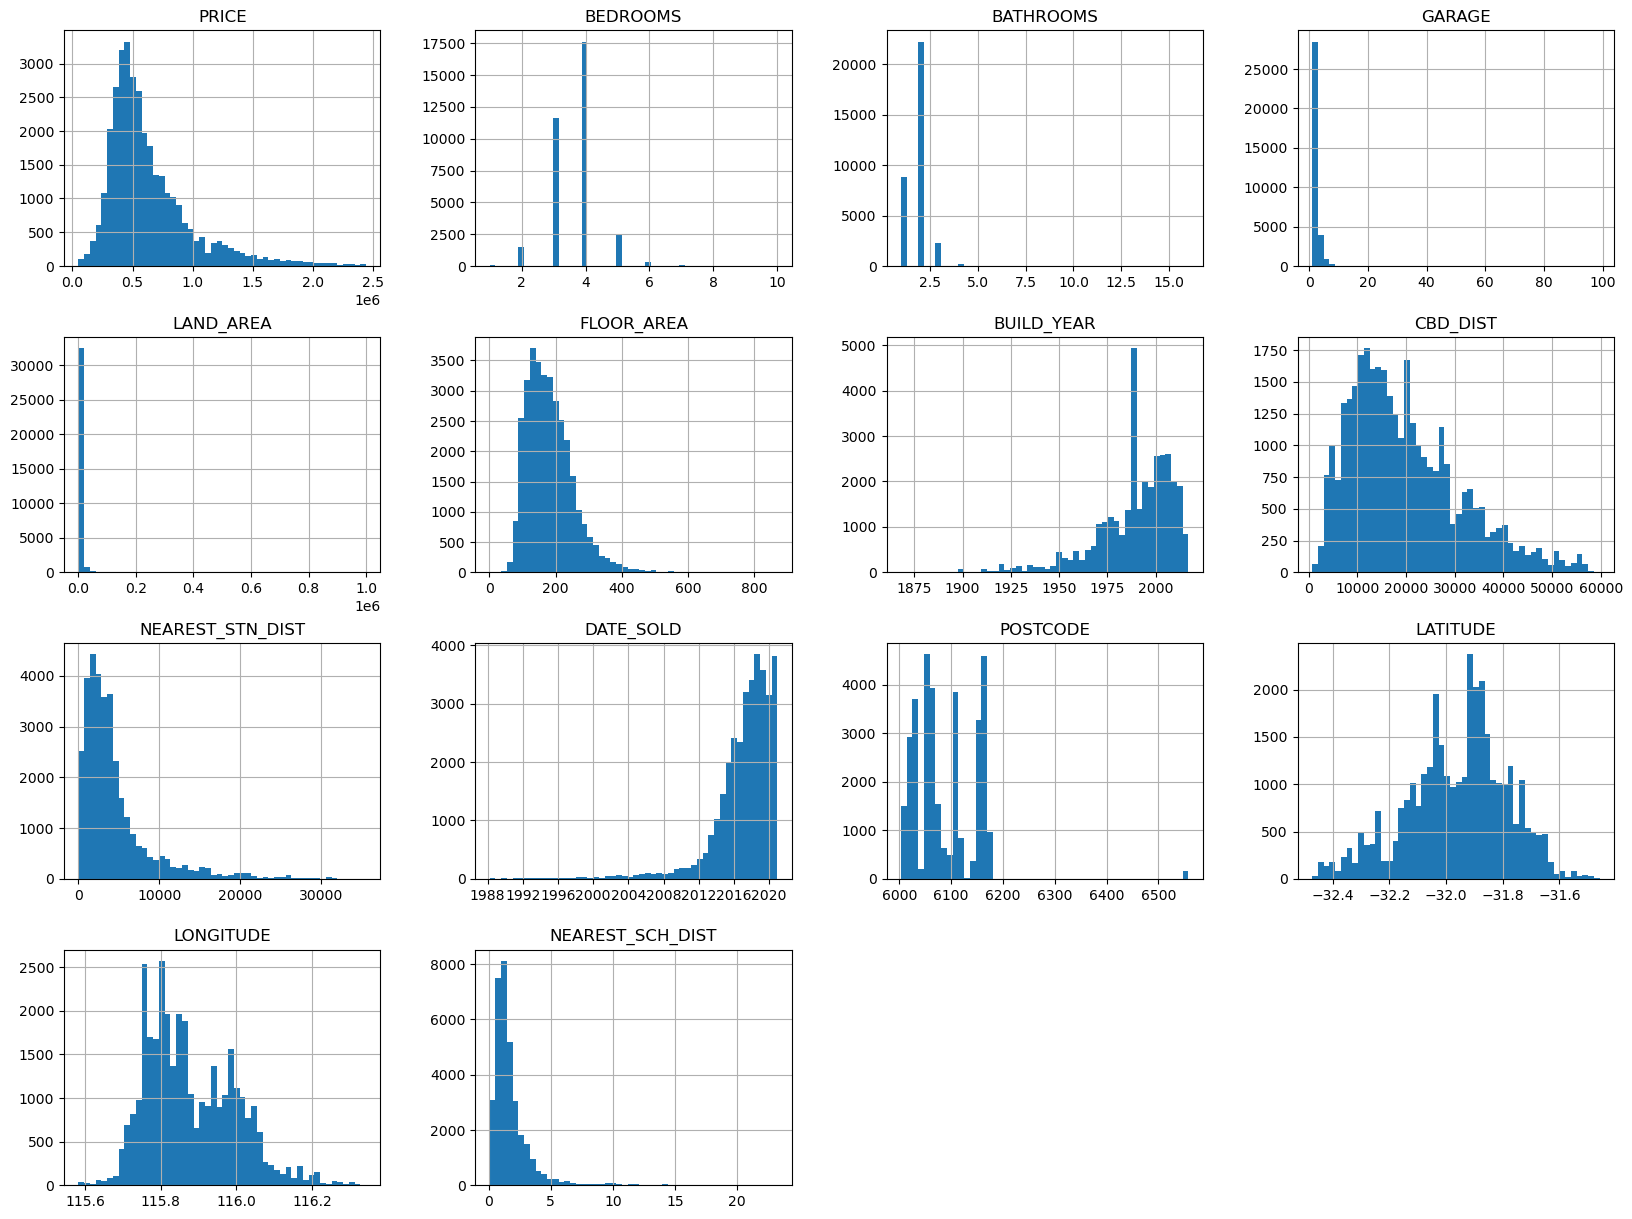

In [14]:
perth.hist(bins=50, figsize=(20,15))

In [15]:
perth.describe()

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST
count,3.365600e+04,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000
mean,6.370720e+05,3.659110,1.823063,2.199917,2740.644016,183.501545,1989.706436,19777.374465,4523.371494,6089.420074,-31.960664,115.879265,1.815268
std,3.558256e+05,0.752038,0.587427,1.314004,16693.513215,72.102982,19.957499,11364.415413,4495.064024,62.167921,0.177780,0.118137,1.746000
min,5.100000e+04,1.000000,1.000000,1.000000,61.000000,1.000000,1868.000000,681.000000,46.000000,6003.000000,-32.472979,115.582730,0.070912
25%,4.100000e+05,3.000000,1.000000,2.000000,503.000000,130.000000,1980.000000,11200.000000,1800.000000,6050.000000,-32.068437,115.789763,0.880568
50%,5.355000e+05,4.000000,2.000000,2.000000,682.000000,172.000000,1993.000000,17500.000000,3200.000000,6069.000000,-31.933231,115.854198,1.345520
75%,7.600000e+05,4.000000,2.000000,2.000000,838.000000,222.250000,2004.000000,26600.000000,5300.000000,6150.000000,-31.843818,115.970722,2.097225
max,2.440000e+06,10.000000,16.000000,99.000000,999999.000000,870.000000,2017.000000,59800.000000,35500.000000,6558.000000,-31.457450,116.343201,23.254372


#### De flesta hus har runt 4 sovrum, 2 badrum och 2 garage/parkeringsplatser i det här datasetet<br> Pricet ligger runt 640 000 (kunde tyvärr inte hitta vilken valuta det är) men det är lite mer utspritt som kan ses på histogramet

In [16]:
perth["NEAREST_SCH"].nunique()

160

#### I datasetet finns det 160 olika skolor

<AxesSubplot:>

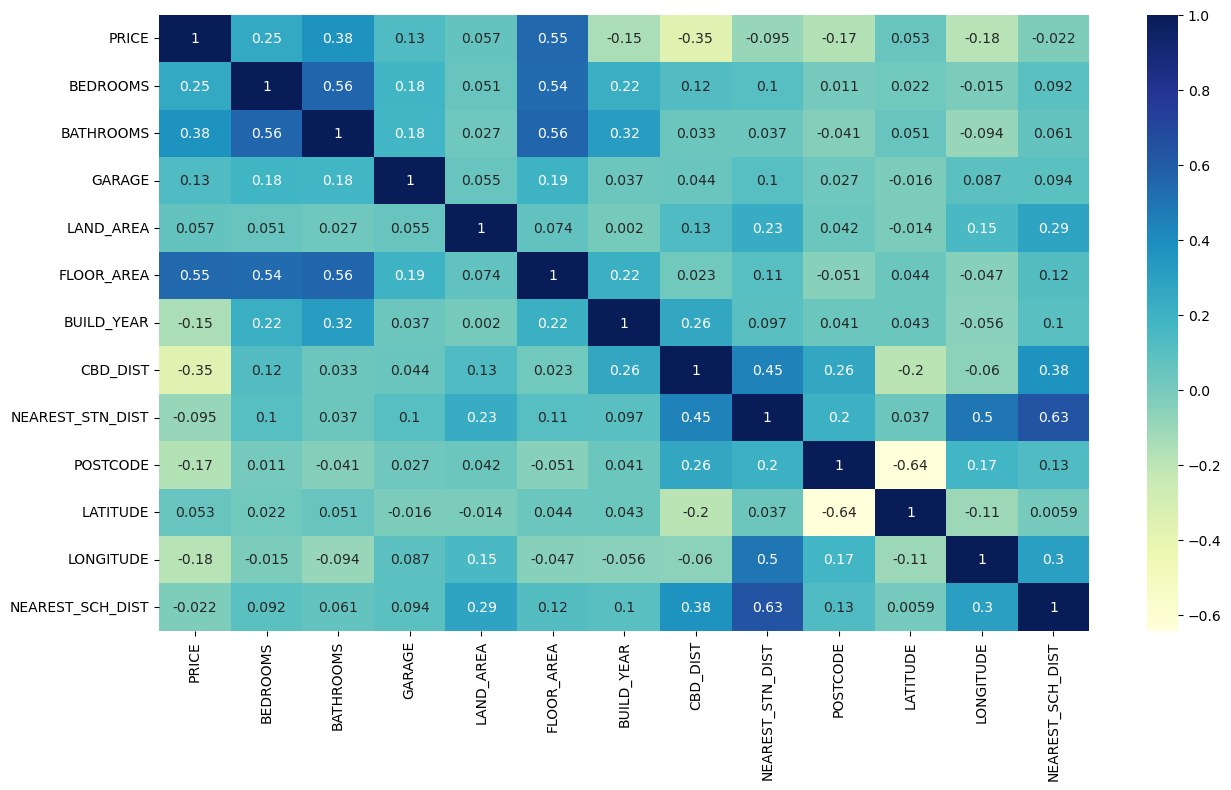

In [17]:
# gör en heatmap för att se relationerna mellan dom bättre 
# jag hade också bara kunnat användas pandas perth.corr() men har så många kolumer så det är snabbare för mig att se 
# relationerna med en heatmap 
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
sns.heatmap(perth.corr(), annot=True, cmap="YlGnBu")

#### Om man tittar på floor area kan jag se att ju mer area man har destå mer badrum och sovrum kommer huset att ha vilket låter logiskt <br> Jag kan också se att pricet kommer öka<br>

### Visar ökningen på priset beronde på floor_area

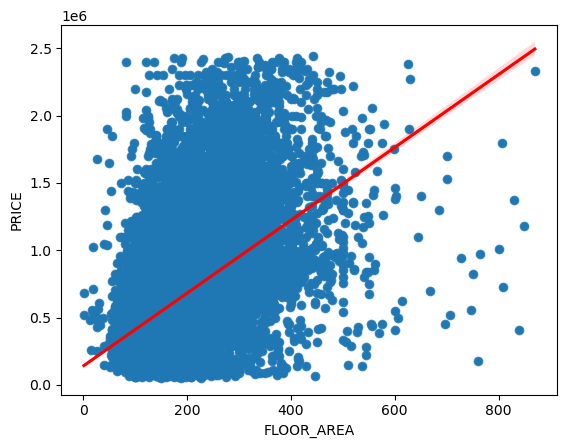

In [18]:
sns.scatterplot(x=perth['FLOOR_AREA'], y=perth['PRICE'])

# det här är för linjen för att vissa att det går upp
sns.regplot(x=perth['FLOOR_AREA'], y=perth['PRICE'], line_kws={'color':'red'})
plt.show()

### Undersöker vart husen befinersig på kartan 

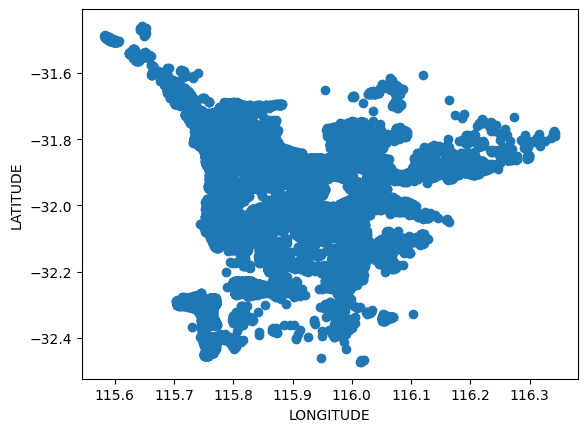

In [19]:
def scatter_map():
    plt.scatter(x=perth['LONGITUDE'], y=perth['LATITUDE'])
    plt.xlabel("LONGITUDE")
    plt.ylabel("LATITUDE")

scatter_map()

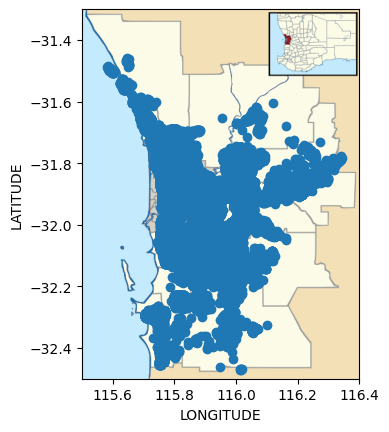

In [20]:
import matplotlib.image as mpimg
# här lägger jag en map av perth i backgrunden

scatter_map()

def img():
    # ladda ner bild
    background_img = mpimg.imread("perth.png")
    # svårt att få den exakt 
    plt.imshow(background_img, extent=[115.5, 116.4, -32.5, -31.3])
    
img()

#### Det här är en väldigt grov överblick på vart husen ligger<br> Ser ut som de flesta hus iallafall befinner sig centralt och att vi har många hus nära vatten

# Fråga och svara på 4 intressanta frågor om datan

#### 1. Om man bor nära vattnet, blir priset på huset dyrare?

#### 2. Vilka är de 3 byraste husen

#### 3. Hur har huspriserna förändrats över tiden?

#### 4. Har namnen på skolan någon betydelse för priset? Om det är någon specific skola som gör att priset går upp


# 1. Om man bor nära vattnet, blir priset på huset dyrare?

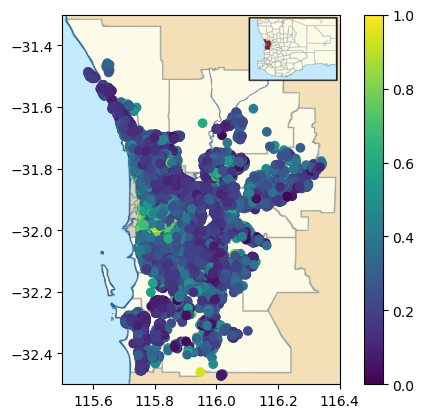

In [21]:
# gul kommer nu vara de dyrase husen kan titta på colorbar saken
plt.scatter(perth["LONGITUDE"], perth["LATITUDE"], c=perth["PRICE"], cmap="viridis")

img()
plt.colorbar()
plt.show()


#### Om vi bara går utifrån det här diagramet ser det inte ut som vattnet har någon störe betydelse.<br> Ser mer ut som om man bor i centrun då blir huset dyrare 

# 2. Vilka är de 3 byraste husen

In [22]:
sort_perth = perth.sort_values(by="PRICE", ascending=False)
top_3 = sort_perth.head(3)
top_3

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST
19255,35 Oakdale Street,Floreat,2440000,6,4,2.0,809,442,2009.0,6800,Loch Street Station,3500,2018-08-01,6014,-31.940600,115.78772,NEWMAN COLLEGE,1.936173
13002,23 Hesperia Avenue,City Beach,2437000,3,2,2.0,1052,278,1965.0,9400,Grant Street Station,6200,2016-04-01,6015,-31.930917,115.76240,NEWMAN COLLEGE,2.507512
10731,2 Viking Road,Dalkeith,2430000,5,3,3.0,1012,411,1997.0,7400,Karrakatta Station,3400,2015-06-01,6009,-31.998400,115.80242,SANTA MARIA COLLEGE,2.332909


# 3. Hur har huspriserna förändrats över tiden?

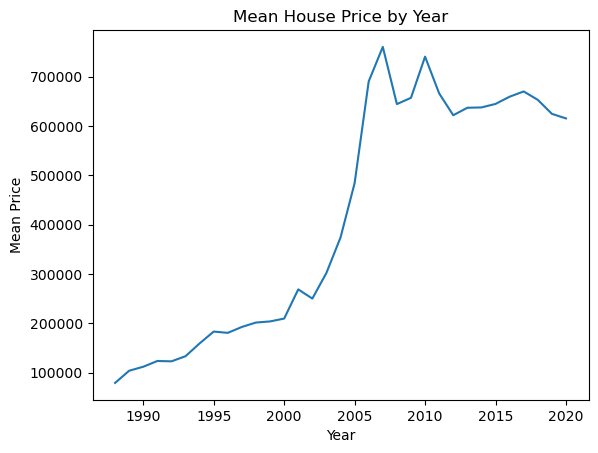

In [23]:
# Groupar data efter år och räknar ut mean för varje år
price_by_year = perth.groupby(perth["DATE_SOLD"].dt.year)["PRICE"].mean()

price_by_year.plot(kind="line")
plt.title("Mean House Price by Year")
plt.xlabel("Year")
plt.ylabel("Mean Price")
plt.show()

#### Ingen överaskning här vi kan tydligt se att det har gått upp kraftigt från 90 talet till nu 

# 4. Har namnen på skolan någon betydelse för priset? Om det är någon specific skola som gör att priset går upp

#### De tio dyraste husen utifrån vilken skola som ligger närmast dom ("NEAREST_SCH" är skol namn)

In [24]:
grouped = perth.groupby("NEAREST_SCH")
mean_prices = grouped["PRICE"].mean()
sorted_prices = mean_prices.sort_values(ascending=False)

sorted_prices.head(10)

NEAREST_SCH
ST HILDA'S ANGLICAN SCHOOL FOR GIRLS    1.842900e+06
CHRIST CHURCH GRAMMAR SCHOOL            1.723178e+06
PRESBYTERIAN LADIES COLLEGE             1.609773e+06
SCOTCH COLLEGE                          1.560759e+06
METHODIST LADIES' COLLEGE               1.531500e+06
NEWMAN COLLEGE                          1.489501e+06
IONA PRESENTATION COLLEGE               1.354203e+06
JOHN XXIII COLLEGE                      1.312609e+06
SANTA MARIA COLLEGE                     1.301548e+06
HALE SCHOOL                             1.247226e+06
Name: PRICE, dtype: float64

#### Ungefär vart varje skola ligger

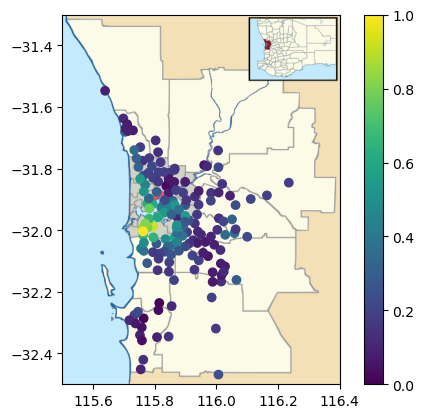

In [25]:
# gul kommer nu vara de dyrase husen kan titta på colorbar saken
school_df = perth.groupby("NEAREST_SCH").mean().reset_index()[["NEAREST_SCH", "PRICE", "LONGITUDE", "LATITUDE"]]

plt.scatter(school_df["LONGITUDE"], school_df["LATITUDE"], c=school_df["PRICE"], cmap="viridis")

img()
plt.colorbar()
plt.show()

#### Var de tre dyraste husen ligger utfrån skolan som är närmast

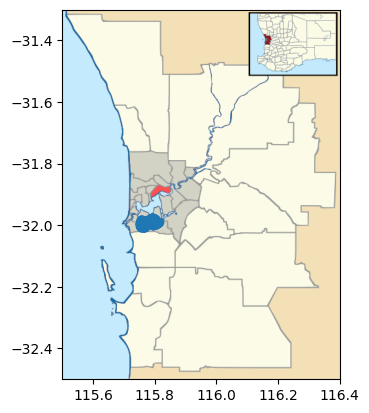

In [26]:
tre_houses = perth[(perth["NEAREST_SCH"] == "ST HILDA'S ANGLICAN SCHOOL FOR GIRLS") | 
            (perth["NEAREST_SCH"] == "CHRIST CHURCH GRAMMAR SCHOOL") | 
            (perth["NEAREST_SCH"] == "PRESBYTERIAN LADIES COLLEGE")]

plt.scatter(tre_houses["LONGITUDE"], tre_houses["LATITUDE"])

img()
plt.show()

In [27]:
tre_houses.describe()

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST
count,2.320000e+02,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000
mean,1.713160e+06,3.525862,2.094828,2.147410,837.133621,214.112069,1969.974693,8777.155172,1225.543103,6010.133621,-31.991656,115.778926,1.259228
std,4.538442e+05,0.911316,0.708372,0.793366,799.936704,78.724053,27.520219,1682.258998,928.215766,0.977801,0.007796,0.017672,0.810451
min,4.500000e+05,1.000000,1.000000,1.000000,145.000000,27.000000,1900.000000,6000.000000,148.000000,6009.000000,-32.006589,115.752609,0.135432
25%,1.411250e+06,3.000000,2.000000,2.000000,485.750000,159.000000,1945.750000,7100.000000,506.250000,6009.000000,-31.996381,115.762745,0.563420
50%,1.772500e+06,4.000000,2.000000,2.000000,732.500000,209.500000,1975.000000,8450.000000,789.500000,6010.000000,-31.991380,115.778892,1.119697
75%,2.070000e+06,4.000000,2.000000,2.000000,997.500000,261.000000,1990.000000,10325.000000,1900.000000,6011.000000,-31.985878,115.795288,1.911062
max,2.425000e+06,7.000000,5.000000,6.000000,6731.000000,455.000000,2016.000000,11500.000000,3700.000000,6012.000000,-31.975955,115.813040,3.431865


In [28]:
perth.describe()

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST
count,3.365600e+04,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000
mean,6.370720e+05,3.659110,1.823063,2.199917,2740.644016,183.501545,1989.706436,19777.374465,4523.371494,6089.420074,-31.960664,115.879265,1.815268
std,3.558256e+05,0.752038,0.587427,1.314004,16693.513215,72.102982,19.957499,11364.415413,4495.064024,62.167921,0.177780,0.118137,1.746000
min,5.100000e+04,1.000000,1.000000,1.000000,61.000000,1.000000,1868.000000,681.000000,46.000000,6003.000000,-32.472979,115.582730,0.070912
25%,4.100000e+05,3.000000,1.000000,2.000000,503.000000,130.000000,1980.000000,11200.000000,1800.000000,6050.000000,-32.068437,115.789763,0.880568
50%,5.355000e+05,4.000000,2.000000,2.000000,682.000000,172.000000,1993.000000,17500.000000,3200.000000,6069.000000,-31.933231,115.854198,1.345520
75%,7.600000e+05,4.000000,2.000000,2.000000,838.000000,222.250000,2004.000000,26600.000000,5300.000000,6150.000000,-31.843818,115.970722,2.097225
max,2.440000e+06,10.000000,16.000000,99.000000,999999.000000,870.000000,2017.000000,59800.000000,35500.000000,6558.000000,-31.457450,116.343201,23.254372


#### Det är svårt att säga om det är just skolan i närheten som gör att priset på husen ökar. <br> Det kan ju också beror att dom här husen ligger nära centrum behöver ju inte vara så att skolan är bättre.<br>  Dessa husen har också störe floor_area som vi såg i heatmapen att de hade betydels på priset.

# Summera dina slutsatser & Skriv ett avslut

Jag har lärt mig att huspriserna i Perth har ökat kraftigt över tiden och att de flest kostsamma husen i staden ligger i närheten av centrum. Jag har också undersökt om närheten till vattnet har någon påverkan på huspriserna. Det verkar inte ha någon större betydelse. Däremot har jag funnit att storleken på husen (floor_area) har en korrelation med priset.

När det gäller skolorna i närheten, så är det svårt att säga om det är just skolan som påverkar priset eller om det beror på något annat. Kan var något jag kan undersöka mer på i framtiden. För jag har inte mer tid just nu innan inlämningen stänger.  

För framtida undersökningar skulle det vara intressant att undersöka andra faktorer som kan påverka huspriserna i Perth. Som tillgång till transportmedel och närhet till parker och grönområden.

Länkar: https://www.youtube.com/watch?v=kUsNb_gOo_s&t=1713s
Jag följde den här videon för någon vecka sen är en lektion på California Housing Price Prediction.<br>
Han gör en snabb analys på data innan han går över till ml delen. Det var där jag såg hur man kunde använda en bild i bakgrunden.<br>
Och heatmapen visste jag från en annan youtube video som jag tittade på. Som jag också följde för någon vecka sen. <br>
https://www.youtube.com/watch?v=Wqmtf9SA_kk&t=3s